In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [7]:
df = pd.read_csv('data.csv')
df = df.dropna()
df = pd.DataFrame(df)
df.sort_values(by='date_', inplace = True)
df.head()

,id,insCode,first_price,date_,close_price,last_price,total_count,total_volumn,total_value,min_price,max_price,yesterday_price,close_price_change,close_price_percentage,last_price_change,last_price_percentage
93,1136130,46348559193224090,1900.0,2007-03-11,1900.0,1900.0,7736,468077431,8.894372e+11,1900.0,1938.0,1900.0,0.0,0.0000,1900.0,0.00
94,1136303,46348559193224090,1938.0,2007-03-12,1938.0,1938.0,9214,100041000,1.938795e+11,1938.0,1938.0,1900.0,38.0,2.0000,38.0,2.00
95,1136356,46348559193224090,1976.0,2007-03-13,1973.0,1973.0,5862,126270939,2.492415e+11,1915.0,1976.0,1938.0,35.0,1.8060,35.0,1.80
96,1136543,46348559193224090,1934.0,2007-03-14,1934.0,1934.0,1901,26705128,5.166638e+10,1934.0,1966.0,1973.0,-39.0,-1.9767,-39.0,-1.97
97,1136618,46348559193224090,1896.0,2007-03-17,1898.0,1898.0,1514,14877283,2.823901e+10,1896.0,1927.0,1934.0,-36.0,-1.8614,-36.0,-1.86


In [8]:
ndays = 30
r = 2 #range max , min

n = len(df['date_']) - ndays
x = df['date_'][n:]
# dates = []
# for date in enumerate(x):
#     dates.append(date)
y = df['close_price'][n:]
prices = []
for price in enumerate(y):
    prices.append(price)
YMAX = int(y.max())
YMIN = int(y.min())

In [9]:
yMINs = []
for i in range(r-1,len(prices)-r):
    for j in range(1,r):
        if prices[i][1] < prices[i-j][1] and prices[i][1] < prices[i+j][1]:
            if j == r-1:
                yMINs.append(prices[i])
        else:
            break

yMAXs = []            
for i in range(r-1,len(prices)-r):
    for j in range(1,r):
        if prices[i][1] > prices[i-j][1] and prices[i][1] > prices[i+j][1]:
            if j == r-1:
                yMAXs.append(prices[i])
        else:
            break

yMINs,yMAXs

([(4, 8450.0),
  (9, 7940.0),
  (12, 7920.0),
  (17, 5890.0),
  (23, 6210.0),
  (25, 6210.0)],
 [(3, 8480.0),
  (5, 8570.0),
  (10, 8440.0),
  (20, 6340.0),
  (24, 6270.0),
  (26, 6450.0)])

In [11]:
Ymeans = []
count = 0
for Y in range(YMIN,YMAX,100):
    for i in range(1,len(prices)-1):
        if prices[i-1][1] <Y< prices[i+1][1]:
            count += 1
    Ymeans.append((Y,count))
    count = 0
Ymeans

[(5890, 0),
 (5990, 1),
 (6090, 1),
 (6190, 1),
 (6290, 4),
 (6390, 2),
 (6490, 0),
 (6590, 0),
 (6690, 0),
 (6790, 0),
 (6890, 0),
 (6990, 0),
 (7090, 0),
 (7190, 0),
 (7290, 0),
 (7390, 1),
 (7490, 2),
 (7590, 2),
 (7690, 2),
 (7790, 2),
 (7890, 2),
 (7990, 3),
 (8090, 4),
 (8190, 4),
 (8290, 3),
 (8390, 3),
 (8490, 1)]

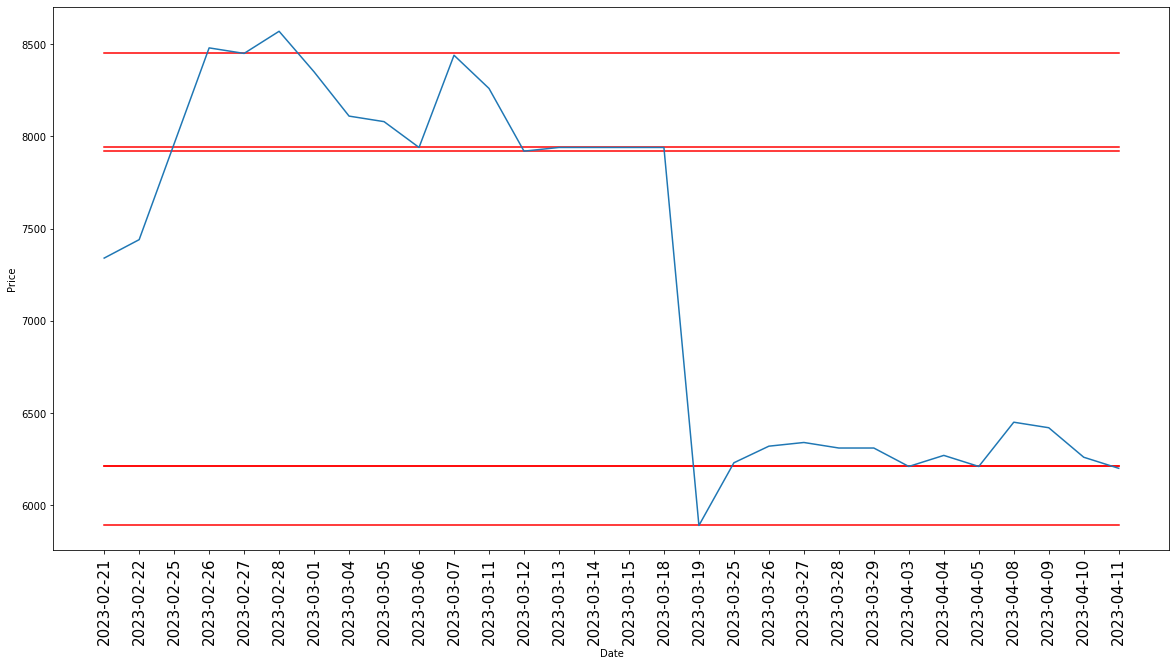

In [12]:
import datetime as dt
import matplotlib.dates as mdates

xarray = np.arange(len(x), dtype=int)
plt.figure(figsize=(20,10))

for yMIN in yMINs:
    ymin = np.full_like(xarray,yMIN[1])
    plt.plot(x, ymin, '-r' )
    
# for yMAX in yMAXs:
#     ymax = np.full_like(xarray,yMAX[1])
#     plt.plot(x, ymax, '-g' )

# for Y,c in Ymeans:
#     if c > 3:
#         ymean = np.full_like(xarray,Y)
#         plt.plot(x, ymean, '-k' )    
    
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=90, fontweight='light',  fontsize='15',)
plt.plot(x,y)